In [55]:
import sys
sys.version

import exoplanet
print(f"exoplanet.__version__ = '{exoplanet.__version__}'")



import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import exoplanet as xo
import pymc3 as pm
import pymc3_ext as pmx
from astropy import units as u
from astropy.constants import M_earth, M_sun
from simulate import *
from model import *
import pickle
from collections import defaultdict

import matplotlib 
matplotlib.rc('xtick', labelsize=18) 
matplotlib.rc('ytick', labelsize=18)


exoplanet.__version__ = '0.5.1'


In [57]:
folder = './traces/Sep7/'
files = [
    'period1000_inc10_gaia60_roman5.pkl',
    'period1000_inc10_gaia60_roman10.pkl',
    'period1000_inc10_gaia60_roman20.pkl',
    'period1000_inc10_gaia60_romanNA.pkl',
    'period1000_inc45_gaia60_roman5.pkl',
    'period1000_inc45_gaia60_roman10.pkl',
    'period1000_inc45_gaia60_roman20.pkl',
    'period1000_inc45_gaia60_romanNA.pkl',
    'period1000_inc80_gaia60_roman5.pkl',
    'period1000_inc80_gaia60_roman10.pkl',
    'period1000_inc80_gaia60_roman20.pkl',
    'period1000_inc80_gaia60_romanNA.pkl',
    'period4327_inc10_gaia60_roman5.pkl',
    'period4327_inc10_gaia60_roman10.pkl',
    'period4327_inc10_gaia60_roman20.pkl',
    'period4327_inc10_gaia60_romanNA.pkl',
    'period4327_inc45_gaia60_roman5.pkl',
    'period4327_inc45_gaia60_roman10.pkl',
    'period4327_inc45_gaia60_roman20.pkl',
    'period4327_inc45_gaia60_romanNA.pkl',
    'period4327_inc80_gaia60_roman5.pkl',
    'period4327_inc80_gaia60_roman10.pkl',
    'period4327_inc80_gaia60_roman20.pkl',
    'period4327_inc80_gaia60_romanNA.pkl',
    'period10000_inc10_gaia60_roman5.pkl',
    'period10000_inc10_gaia60_roman10.pkl',
    'period10000_inc10_gaia60_roman20.pkl',
    'period10000_inc10_gaia60_romanNA.pkl',
    'period10000_inc45_gaia60_roman5.pkl',
    'period10000_inc45_gaia60_roman10.pkl',
    'period10000_inc45_gaia60_roman20.pkl',
    'period10000_inc45_gaia60_romanNA.pkl',
    'period10000_inc80_gaia60_roman5.pkl',
    'period10000_inc80_gaia60_roman10.pkl',
    'period10000_inc80_gaia60_roman20.pkl',
    'period10000_inc80_gaia60_romanNA.pkl'
]

periods = [1000., 4327.631, 10000.]
incs = [10., 45., 80.]
roman_errs = [5e-6, 10e-6, 20e-6, None]


index = -1
params_earth = defaultdict(list)
params_jup = defaultdict(list)
params_earth_std = defaultdict(list)
params_jup_std = defaultdict(list)
for period_jup in periods:
    for inc_earth in incs:
        for romann_err in roman_errs:
            index += 1
            file = files[index]
            



            with open(folder+file, 'rb') as buff:
                data = pickle.load(buff)  

            model, trace = data['model'], data['trace']

            parameters = ["m_planet", "P"]

            #print("")
            #print("true values:")
            #print("Jupiter period = " + str(period_jup))
            #print("Earth inclindation = " + str(np.radians(inc_earth)))
            #print("")

            print("")
            print("")
            print("")
            print(file)
            for param in parameters:
                
                
                planet1_med = np.median(trace.posterior[param].values[:, :, 0])
                planet2_med = np.median(trace.posterior[param].values[:, :, 1])

                planet1_std = np.std(trace.posterior[param].values[:, :, 0])
                planet2_std = np.std(trace.posterior[param].values[:, :, 1])

                
                print(param + "_earth: " + str(planet1_med) + " +/- " + str(planet1_std))
                print(param + "_jup: " + str(planet2_med) + "+/-" + str(planet2_std))

                params_earth[param].append(planet1_med)
                params_jup[param].append(planet2_med)
                
                params_earth_std[param].append(planet1_std)
                params_jup_std[param].append(planet2_std)

                print("")

        
        
        

    






period1000_inc10_gaia60_roman5.pkl
m_planet_earth: 2.3642608737461654 +/- 12.943686254138663
m_planet_jup: 331.56197719783376+/-40.0026468023394

P_earth: 66.29008378228119 +/- 128.04515675032147
P_jup: 999.4246530402895+/-0.5783667082350477




period1000_inc10_gaia60_roman10.pkl
m_planet_earth: 0.5113331872410674 +/- 1.7884275552371465
m_planet_jup: 330.0895108227483+/-38.71950728469254

P_earth: 15.242727477733947 +/- 116.95886974195459
P_jup: 999.4247641109934+/-0.40871667798507516




period1000_inc10_gaia60_roman20.pkl
m_planet_earth: 1.3406460589814282 +/- 32.881080701450074
m_planet_jup: 308.13400351360866+/-33.29360725173016

P_earth: 187.35894411109922 +/- 166.18417374804014
P_jup: 998.9432052142165+/-0.6016074451125708




period1000_inc10_gaia60_romanNA.pkl
m_planet_earth: 7.162531109885179 +/- 25.364490268778873
m_planet_jup: 345.44449516627833+/-32.66747705357687

P_earth: 141.95855708730144 +/- 190.86309820946425
P_jup: 999.2583373432452+/-0.5692615716784402




perio




period10000_inc80_gaia60_roman20.pkl
m_planet_earth: 1.341887299088789 +/- 4.793866793382622
m_planet_jup: 321.96061143483064+/-2.9891444448574567

P_earth: 364.24018660169895 +/- 5.403338439142437
P_jup: 9879.87032471045+/-93.30859630101958




period10000_inc80_gaia60_romanNA.pkl
m_planet_earth: 2.4795962677995576 +/- 5.848812982917437
m_planet_jup: 311.10869587885645+/-6.814937693652141

P_earth: 284.2194428913333 +/- 112.04576197602636
P_jup: 9185.639625754378+/-503.032882283055



In [79]:
from pylab import *

cmap = cm.get_cmap('winter', len(files))    # PiYG

colors = []
for i in range(cmap.N):
    rgba = cmap(i)
    # rgb2hex accepts rgb or rgba
    colors.append(matplotlib.colors.rgb2hex(rgba))
    
    
ys = np.linspace(1, 0, len(files))


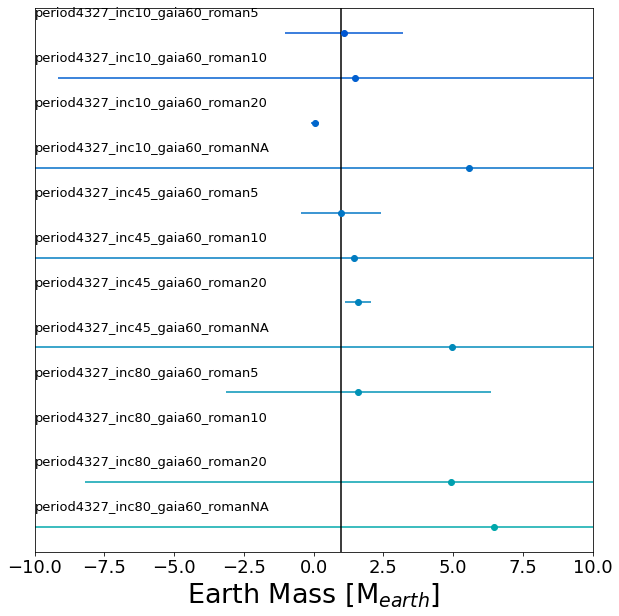

In [118]:
medians = params_earth['m_planet']
stdevs = params_earth_std['m_planet']

plt.figure(figsize=[10, 10])
plt.gca().axes.get_yaxis().set_visible(False)

xmin = -10
xmax = 10

for ii in range(12, 24):
    median = medians[ii]
    std = stdevs[ii]
    file = files[ii]
    y = ys[ii]
    color = colors[ii]
    
    plt.errorbar(median, y, xerr=std, marker = 'o', color = color)
    plt.text(xmin, y+.01, file[:-4], fontsize = 13)

plt.axvline(x=1, ymin=0, ymax=1, color = 'k')
plt.xlim(xmin,xmax)
plt.xlabel(r'Earth Mass [M$_{earth}$]', fontsize = 27)


plt.show()


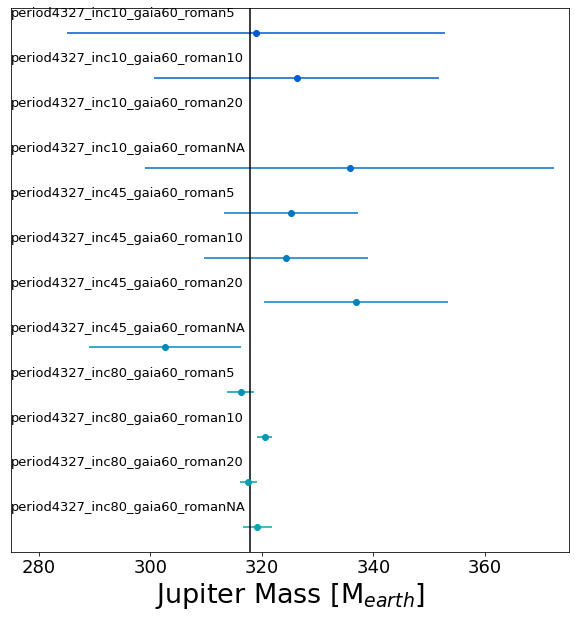

In [120]:
medians = params_jup['m_planet']
stdevs = params_jup_std['m_planet']

plt.figure(figsize=[10, 10])
plt.gca().axes.get_yaxis().set_visible(False)

xmin = 275
xmax = 375

for ii in range(12, 24):
    median = medians[ii]
    std = stdevs[ii]
    file = files[ii]
    y = ys[ii]
    color = colors[ii]
    
    plt.errorbar(median, y, xerr=std, marker = 'o', color = color)
    plt.text(xmin, y+.01, file[:-4], fontsize = 13)

    
plt.axvline(x=317.83, ymin=0, ymax=1, color = 'k')
plt.xlim(xmin, xmax)
plt.xlabel(r'Jupiter Mass [M$_{earth}$]', fontsize = 27)


plt.show()


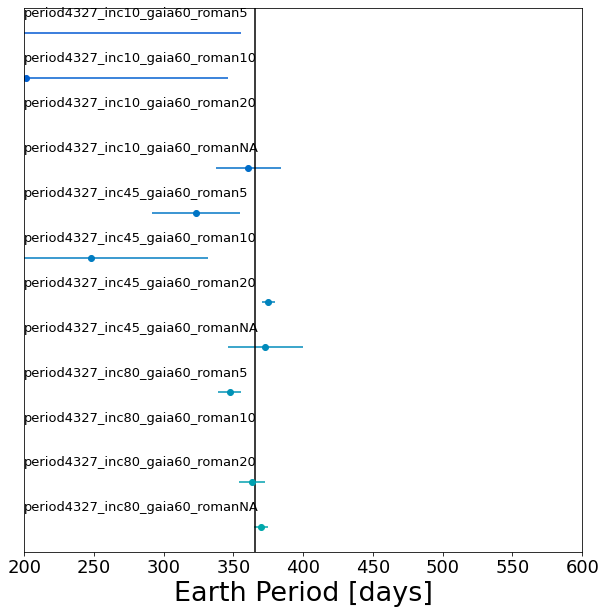

In [121]:


medians = params_earth['P']
stdevs = params_earth_std['P']

plt.figure(figsize=[10, 10])
plt.gca().axes.get_yaxis().set_visible(False)
xmin = 200
xmax = 600

for ii in range(12, 24):
    median = medians[ii]
    std = stdevs[ii]
    file = files[ii]
    y = ys[ii]
    color = colors[ii]
    
    plt.errorbar(median, y, xerr=std, marker = 'o', color = color)
    plt.text(xmin, y+.01, file[:-4], fontsize = 13)
    
plt.axvline(x=365.256, ymin=0, ymax=1, color = 'k')
plt.xlim(xmin, xmax)
plt.xlabel(r'Earth Period [days]', fontsize = 27)


plt.show()

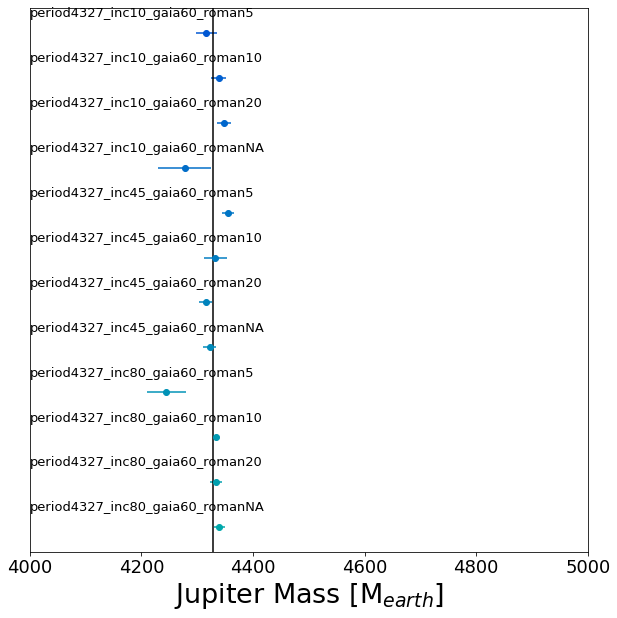

In [124]:
medians = params_jup['P']
stdevs = params_jup_std['P']

plt.figure(figsize=[10, 10])
plt.gca().axes.get_yaxis().set_visible(False)
xmin = 4000
xmax = 5000

for ii in range(12, 24):
    median = medians[ii]
    std = stdevs[ii]
    file = files[ii]
    y = ys[ii]
    color = colors[ii]
    
    plt.errorbar(median, y, xerr=std, label = file, marker = 'o', color = color)
    plt.text(xmin, y+.01, file[:-4], fontsize = 13)

plt.axvline(x=4327.631, ymin=0, ymax=1, color = 'k')
plt.xlim(xmin, xmax)
plt.xlabel(r'Jupiter Mass [M$_{earth}$]', fontsize = 27)


plt.show()

In [ ]:

    
    ####simulate data
    T_subtract = 2454000
    # orbital parameters from https://www.princeton.edu/~willman/planetary_systems/Sol/
    # BJD determined by converting values above using https://ssd.jpl.nasa.gov/tc.cgi#top

    P_earth = 365.256
    e_earth = 0.0167
    Tper_earth= 2454115.5208333 - T_subtract
    omega_earth = np.radians(102.9)
    Omega_earth = np.radians(0.0)
    inclination_earth = np.radians(inc_earth)
    m_earth = 1*3.00273e-6 #units m_sun



    P_jup = period_jup
    e_jup = 0.0484
    Tper_jup = 2455633.7215278 - T_subtract
    omega_jup = np.radians(274.3) - 2*np.pi
    Omega_jup = np.radians(100.4)
    inclination_jup = np.radians(1.31) + inclination_earth
    m_jup = 317.83*3.00273e-6 #units m_sun


    m_sun = 333030 #earth masses


    times_observed_astrometry_gaia = []
    t_0 = int(Tper_earth)
    for ii in range(t_0, t_0+3600):
        if ii % 90 == 0:
            times_observed_astrometry_gaia.append(ii)

    if roman_err is not None:
        t_1 =  times_observed_astrometry_gaia[-1]+1800
        times_observed_astrometry_roman = []
        for ii in range(t_1, t_1+1800):
            if ii % 90 == 0:
                times_observed_astrometry_roman.append(ii)


    times_observed_rv = []
    t_0 = int(Tper_earth)
    add_data = True
    for ii in range(t_0, t_0+3600):

        if ii % 180 == 0:
            if add_data:
                add_data = False
            else:
                add_data = True

        if add_data:
            times_observed_rv.append(ii)


    orbit_params_earth = [P_earth, e_earth, Tper_earth, omega_earth, Omega_earth, inclination_earth, m_earth]
    orbit_params_jup = [P_jup, e_jup, Tper_jup, omega_jup, Omega_jup, inclination_jup, m_jup]

    n_planets = 2
    orbit_params = [orbit_params_earth, orbit_params_jup]


    sigma_rv = 0.3

    sigma_ra_gaia = 6e-5
    sigma_dec_gaia = 6e-5
    parallax = 0.1



    times, rv_results, ra_results, dec_results = simulate_data(
        n_planets, 
        sigma_rv, 
        sigma_ra_gaia,
        sigma_dec_gaia,
        parallax,
        orbit_params,
        times_observed_rv = times_observed_rv,
        times_observed_astrometry = times_observed_astrometry_gaia
        )


    [[times_rv, times_observed_rv, times_astrometry, times_observed_astrometry],
    [rv_orbit, rv_orbit_sum, rv_sim, rv_sim_sum],
    [ra_orbit, ra_orbit_sum, ra_sim, ra_sim_sum],
    [dec_orbit, dec_orbit_sum, dec_sim, dec_sim_sum]]  = times, rv_results, ra_results, dec_results


    if roman_err is not None:
        sigma_ra_roman = roman_err
        sigma_dec_roman = roman_err



        times, rv_results, ra_results, dec_results = simulate_data(
            n_planets, 
            sigma_rv, 
            sigma_ra_roman,
            sigma_dec_roman,
            parallax,
            orbit_params,
            times_observed_rv = times_observed_rv,
            times_observed_astrometry = times_observed_astrometry_roman
            )

        times_astrometry = np.append(times_astrometry, times[2], axis=0)

        times_observed_astrometry = np.append(times_observed_astrometry, times[3], axis=0)

        ra_orbit = np.append(ra_orbit, ra_results[0], axis=0)
        ra_orbit_sum = np.append(ra_orbit_sum, ra_results[1], axis=0)
        ra_sim = np.append(ra_sim, ra_results[2], axis=0)
        ra_sim_sum = np.append(ra_sim_sum, ra_results[3], axis=0)

        dec_orbit = np.append(dec_orbit, dec_results[0], axis=0)
        dec_orbit_sum = np.append(dec_orbit_sum, dec_results[1], axis=0)
        dec_sim = np.append(dec_sim, dec_results[2], axis=0)
        dec_sim_sum = np.append(dec_sim_sum, dec_results[3], axis=0)
        
        
        
    
    x_rv = np.array(times_observed_rv)
    y_rv = rv_sim_sum
    y_rv_err = np.full(np.shape(y_rv), sigma_rv)

    x_astrometry = np.array(times_observed_astrometry)
    ra_data = ra_sim_sum
    ra_err = np.full(np.shape(ra_data), 1e-5)
    dec_data = dec_sim_sum
    dec_err = np.full(np.shape(dec_data), 1e-5)


    # make a fine grid that spans the observation window for plotting purposes
    t_astrometry = np.linspace(x_astrometry.min() - 5, x_astrometry.max() + 5, 1000)
    t_rv = np.linspace(x_rv.min() - 5, x_rv.max() + 5, 1000)

    # for predicted orbits
    t_fine = np.linspace(x_astrometry.min() - 500, x_astrometry.max() + 500, num=1000)

    
    
    
    

    
    import arviz as az

    az.summary(
        trace,
        var_names=["P", "tperi", "omega", "Omega_sum", "Omega_plus", "Omega_minus", 
                   "incl", "ecc", "plx", "m_planet", "a"],
    )

    
    a_true_earth = a_from_Kepler3(P_earth, 1.0+m_earth)
    a_true_jup = a_from_Kepler3(P_jup, 1.0+m_jup)

    truth_both = [P_earth, P_jup, e_earth, e_jup, omega_earth, omega_jup, Omega_earth+Omega_jup, Omega_earth-Omega_jup, 
                  inclination_earth, inclination_jup, 0.1, m_earth*m_sun, m_jup*m_sun, a_true_earth, a_true_jup]


    


    import corner

    _ = corner.corner(
        trace, var_names=["P", "ecc", "omega", "Omega_sum", "Omega_minus", "incl", 
                          "plx", "m_planet", "a"], quantiles=[0.16, 0.5, 0.84],
                           show_titles=True, title_kwargs={"fontsize": 13}, 
                           truths = truth_both, truth_color = "#03003a"
    )

    
    plt.savefig('./corners/'+file[8:-4]+'.pdf')
    plt.show()
    
    
    
    
    
    
    



    import corner

    _ = corner.corner(
        trace, var_names=["Omega_plus", "Omega_sum", "Omega_minus", "Omega"], quantiles=[0.16, 0.5, 0.84],
                           show_titles=True, title_kwargs={"fontsize": 13}
    )


    plt.show()


    ekw = dict(fmt=".k", lw=0.5)

    fig, ax = plt.subplots(nrows=2, sharex=True, figsize=(9, 9))
    ax[0].set_ylabel(r'$\rho\,$ ["]')
    ax[1].set_ylabel(r"P.A. [radians]")
    ax[1].set_xlabel(r"time [days]")

    tot_ra_err = np.sqrt(
        ra_err ** 2
        + np.exp(2 * np.median(trace.posterior["log_ra_s"].values, axis=(0, 1)))
    )
    tot_dec_err = np.sqrt(
        dec_err ** 2
        + np.exp(2 * np.median(trace.posterior["log_dec_s"].values, axis=(0, 1)))
    )

    ax[0].errorbar(x_astrometry, ra_data, yerr=tot_ra_err, **ekw)
    q = np.percentile(trace.posterior["ra_model_fine"].values, [16, 84], axis=(0, 1))
    ax[0].fill_between(t_fine, q[0], q[1], color="#773f6a", alpha=0.8, lw=1)

    ax[1].errorbar(x_astrometry, dec_data, yerr=tot_dec_err, **ekw)
    q = np.percentile(trace.posterior["dec_model_fine"].values, [16, 84], axis=(0, 1))
    ax[1].fill_between(t_fine, q[0], q[1], color="#773f6a", alpha=0.8, lw=1)

    ax[-1].set_xlim(t_fine[0], t_fine[-1])
    _ = ax[0].set_title("posterior inferences")

    plt.show()






    # Compute the posterior predictions for the RV model
    rv_pred = trace.posterior["rv_model_pred"].values
    pred = np.percentile(rv_pred, [16, 50, 84], axis=(0, 1))

    fig, ax = plt.subplots(1, figsize = [15,10], sharey=True)

    ax.errorbar(x_rv, y_rv, yerr=y_rv_err, fmt=".k", alpha = 0.3, label='data', zorder = 0)
    ax.plot(t_rv, pred[1], color="#773f6a", label="model", zorder = 1)
    art = ax.fill_between(t_rv, pred[0], pred[2], color="#773f6a", alpha=0.3)
    art.set_edgecolor("none")

    ax.legend(fontsize=10)
    ax.set_xlim(t_rv.min(), t_rv.max())
    ax.set_xlabel("time [days]")
    ax.set_ylabel("radial velocity [m/s]")
    ax.set_title("MCMC posterior and data")


    plt.show()









    parameters = ["P", "ecc", "omega", "incl", "tperi", "m_planet", "a"]
    truth_chain_plot = [P_earth, P_jup, e_earth, e_jup, omega_earth, omega_jup, inclination_earth, inclination_jup, Tper_earth, Tper_jup, m_earth*m_sun, m_jup*m_sun, a_true_earth, a_true_jup]

    for ii in range(0, len(parameters)):
        plot_truth = False
        param = parameters[ii]

        true_vals_earth = truth_chain_plot[2*ii]
        true_vals_jup = truth_chain_plot[2*ii+1]
        plot_truth = True

        fig, ax = plt.subplots(1,2, figsize = (15,3))
        planet1_chain1 = trace.posterior[param].values[:, :, 0][0]
        planet1_chain2 = trace.posterior[param].values[:, :, 0][1]

        planet2_chain1 = trace.posterior[param].values[:, :, 1][0]
        planet2_chain2 = trace.posterior[param].values[:, :, 1][1]


        nstep = np.arange(1, len(planet1_chain1)+1, 1)


        ax[0].plot(nstep, planet1_chain1)
        ax[0].plot(nstep, planet1_chain2)

        if plot_truth:
            ax[0].axhline(y=true_vals_earth, color = 'r', label = 'truth')
        ax[0].set_title("Sun-b", fontsize = 18)
        ax[0].legend(fontsize = 18)

        ax[1].plot(nstep, planet2_chain1)
        ax[1].plot(nstep, planet2_chain2)

        if plot_truth:
            ax[1].axhline(y=true_vals_jup, color = 'r', label = 'truth')
        ax[1].set_title("Sun-c", fontsize = 18)
        ax[1].legend(fontsize = 18)

        fig.suptitle(param, fontsize = 18)
        fig.tight_layout()
        plt.show()
        
        
